# # Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [2]:
from sklearn import tree 

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [3]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [5]:
print(clf.predict([[0, 1, 1]]))

[0]


In [6]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[1 0]


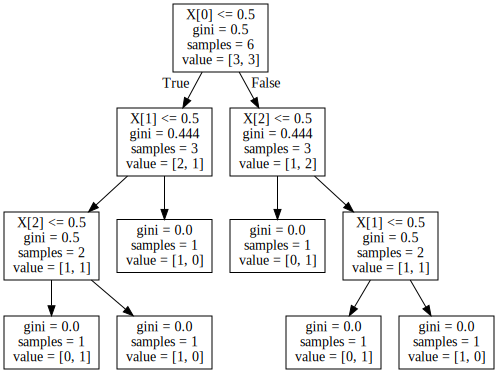

In [7]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

In the following we start using a dataset (from UCI Machine Learning repository)

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
print(len(iris.data))

150


# Declare the type of prediction model and the working criteria for the model induction algorithm

In [9]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [10]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))
print(indices)

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]
print(indices_training)
print(indices_test)

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

[114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83  61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80
 123 133 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95
  20  15  52   3 149  98   6  68 109  96  12 102 120 104 128  46  11 110
 124  41 148   1 113 139  42   4 129  17  38   5  53 143 105   0  34  28
  55  75  35  23  74  31 118  57 131  65  32 138  14 122  19  29 130  49
 136  99  82  79 115 145  72  77  25  81 140 142  39  58  88  70  87  36
  21   9 103  67 117  47]
[114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83  61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80
 123 133 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95
  20  15  52   3 149  98   6  68 109  96  12 102 120 104 128  46  11 110
 124  41 148   1 113 139 

# Fit the learning model on training set

In [11]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [12]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [13]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [22]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 70: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # 87: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 36: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # 21: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # 9: 
sepal length (cm)=4.9, sepal width (cm)=3.1, petal length (cm)=1.5, petal width (cm)=0.1
Predicted: setosa	 True: setosa

Instance # 103: 
sepal length (cm)=6.3, sepal width (cm)=2.9, petal length (cm)=5.6, petal width (cm)=1.8
Predicted: virginica	 True: virginica

Insta

# Obtain model performance results

In [15]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Use Cross Validation

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [17]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree 

## 1. Print the picture in a PDF file

In [25]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Generate a picture here

In [19]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


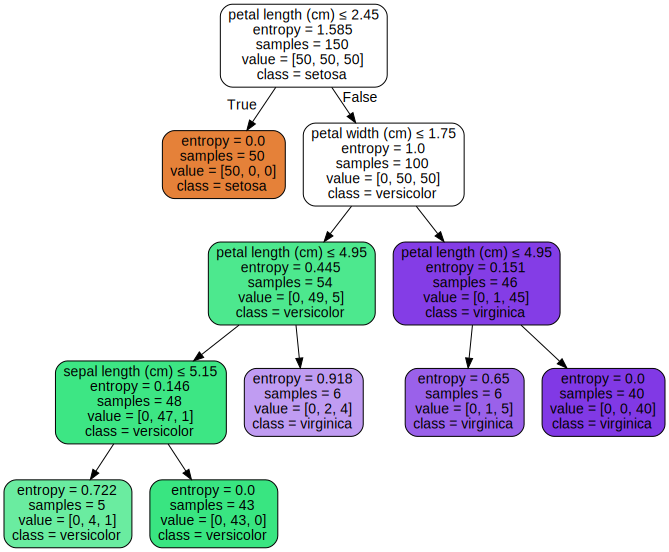

In [26]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
#help(tree._tree.Tree)

# Your work: what you have to do
Modify the given Jupyter notebook on decision trees on Iris data and perform the following tasks:

1. get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica or versicolor which are more difficult to discriminate). Learn the tree in these conditions.
1.b) modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor or vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.
2. learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.
3. build the confusion matrix of the created tree models on the test set and show them. 
4. build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.